### Minimum threshold of subclone detected

/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_2D/n500_250x/parent_0/fp_0.0/axis_-1/M1-4_M2-4/2/result/CLEMENT_decision.membership_count.txt없음


<ipython-input-13-e7d3bb580258>:79: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot (long_df, x = x, y = y, size = 4, alpha = 0.8, linewidth = 0.8,  palette = colorlist, edgecolor = "gray",  ax = ax)
<ipython-input-13-e7d3bb580258>:79: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.stripplot (long_df, x = x, y = y, size = 4, alpha = 0.8, linewidth = 0.8,  palette = colorlist, edgecolor = "gray",  ax = ax)
<ipython-input-13-e7d3bb580258>:82: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot (long_df, x = x, y = y, size = 4, alpha = 0.8, linewidth = 0.8,  palette = colorlist, edgecolor = "gray",  ax = ax)
<ipython-input-13-e7d3bb580258>:82: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.stripplot (long_df, x = x, y = y, size = 4, alpha = 0.8, linewidth = 0.8,  palette = colorlist, edgecolor = "gray",  ax 

/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_2D/n500_30x/parent_0/fp_0.0/axis_-1/M1-4_M2-6/0/result/CLEMENT_decision.membership_count.txt없음
/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_2D/n500_30x/parent_0/fp_0.0/axis_-1/M1-4_M2-6/1/result/CLEMENT_decision.membership_count.txt없음
/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_3D/n500_30x/parent_0/fp_0.0/axis_-1/M1-8_M2-2_M2-4/3/result/CLEMENT_decision.membership_count.txt없음


<ipython-input-13-e7d3bb580258>:79: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot (long_df, x = x, y = y, size = 4, alpha = 0.8, linewidth = 0.8,  palette = colorlist, edgecolor = "gray",  ax = ax)
<ipython-input-13-e7d3bb580258>:79: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.stripplot (long_df, x = x, y = y, size = 4, alpha = 0.8, linewidth = 0.8,  palette = colorlist, edgecolor = "gray",  ax = ax)
<ipython-input-13-e7d3bb580258>:82: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot (long_df, x = x, y = y, size = 4, alpha = 0.8, linewidth = 0.8,  palette = colorlist, edgecolor = "gray",  ax = ax)
<ipython-input-13-e7d3bb580258>:82: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.stripplot (long_df, x = x, y = y, size = 4, alpha = 0.8, linewidth = 0.8,  palette = colorlist, edgecolor = "gray",  ax 

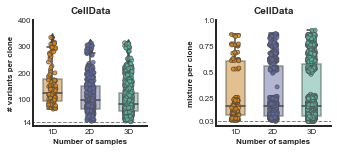

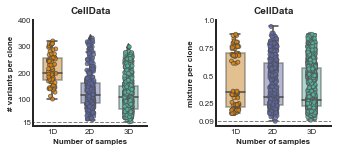

In [13]:
import numpy as np 
import pandas as pd
import os, glob
import matplotlib 
matplotlib.rcParams["font.family"] = 'arial'
import palettable
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.font_manager

def min_threshold_num ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, NUM_PARENT_LIST, FP_RATIO_LIST, AXIS_RATIO_LIST):   
    long_df = pd.DataFrame ( columns = ["DEPTH_MEAN", "NUM_BLOCK", "NUM_MUTATION", "NUM_PARENT", "FP_RATIO", "AXIS_RATIO", "SAMPLENAME", "BENCHMARK_NO", "tool", "CLONE", "membership_count"] )
    long_df_mixture = pd.DataFrame ( columns = ["DEPTH_MEAN", "NUM_BLOCK", "NUM_MUTATION", "NUM_PARENT", "FP_RATIO", "AXIS_RATIO", "SAMPLENAME", "BENCHMARK_NO", "tool", "CLONE", "mixture"] )
    for NUM_PARENT in NUM_PARENT_LIST:        
        for FP_RATIO in FP_RATIO_LIST:
            for AXIS_RATIO in AXIS_RATIO_LIST:        
                for DEPTH_MEAN in DEPTH_MEAN_LIST:
                    for NUM_BLOCK in NUM_BLOCK_LIST:
                        for NUM_MUTATION in NUM_MUTATION_LIST:
                            SAMPLE_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/parent_" + str (NUM_PARENT) + "/fp_" + str(FP_RATIO) + "/axis_" + str(AXIS_RATIO) + "/*") )
#/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_1D/n500_250x/parent_0/fp_0.0/axis_-1/M1-4/1/

                            for SAMPLE_DIR in SAMPLE_DIR_LIST:
                                if os.path.isdir( SAMPLE_DIR ) == True:
                                    SAMPLENAME = SAMPLE_DIR.split("/")[-1]
                                    BENCHMARK_NO_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/parent_" + str (NUM_PARENT) + "/fp_" + str(FP_RATIO) + "/axis_" + str(AXIS_RATIO) + "/" + str(SAMPLENAME) + "/*") )
                                    for BENCHMARK_NO_L in BENCHMARK_NO_LIST:
                                        if os.path.isdir( BENCHMARK_NO_L ) == True:
                                            BENCHMARK_NO = BENCHMARK_NO_L.split("/")[-1]
                                            INPUT_DIR = "/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/parent_" + str (NUM_PARENT) + "/fp_" + str(FP_RATIO) + "/axis_" + str(AXIS_RATIO) + "/" + str(SAMPLENAME) + "/" + str(BENCHMARK_NO) + "/result/CLEMENT_decision.membership_count.txt"
                                            
                                            if not os.path.exists ( INPUT_DIR ):
                                                print (INPUT_DIR + "없음")
                                                continue

                                            df = pd.read_csv (INPUT_DIR , sep = "\t").T
                                            if NUM_BLOCK != 1:
                                                df = df.iloc [0:df.shape[0] - 1, :]    # 맨 마지막은 FP니까 빼자
                                            df.columns = ["membership_count"]
                                            
                                            df["CLONE"]  = df.index
                                            df["SAMPLENAME"] = SAMPLENAME
                                            df["DEPTH_MEAN"], df["NUM_BLOCK"], df["NUM_MUTATION"], df["NUM_PARENT"], df["FP_RATIO"], df["AXIS_RATIO"], df["tool"], df["BENCHMARK_NO"] =  DEPTH_MEAN, NUM_BLOCK, NUM_MUTATION, NUM_PARENT, FP_RATIO, AXIS_RATIO,"CLEMENT_decision", BENCHMARK_NO
                                            long_df = pd.concat ( [long_df, df], axis = 0, ignore_index = True)


                                            df = pd.read_csv (INPUT_DIR.replace ("membership_count.txt", "mixture.txt"), sep = "\t", header = None)
                                            df = df.iloc [:, 0:df.shape[1] - 1]  # 맨 마지막은 FP니까 빼자
                                            df = pd.DataFrame ( df.values[df.values != 0.0].flatten() )
                                            df.columns = ["mixture"]
                                            #print ("SAMPLENAME = {}\tBENCHMARK_NO = {}\tdf.shape = {}".format (SAMPLENAME, BENCHMARK_NO, df.shape) )
                                            
                                            df["CLONE"]  = df.index
                                            df["SAMPLENAME"] = SAMPLENAME
                                            df["DEPTH_MEAN"], df["NUM_BLOCK"], df["NUM_MUTATION"], df["NUM_PARENT"], df["FP_RATIO"], df["AXIS_RATIO"], df["tool"], df["BENCHMARK_NO"] =  DEPTH_MEAN, NUM_BLOCK, NUM_MUTATION, NUM_PARENT, FP_RATIO, AXIS_RATIO,"CLEMENT_decision", BENCHMARK_NO
                                            long_df_mixture = pd.concat ( [long_df_mixture, df], axis = 0, ignore_index = True)
                                            
                                            # for tool in toollist:
                                            #     long_df.loc[len(long_df.index)] = [ DEPTH_MEAN, NUM_BLOCK, NUM_MUTATION, NUM_PARENT, FP_RATIO, AXIS_RATIO, tool, df.loc [tool][1], df.loc [tool][3] ]   # 맨 끝에 하나씩 추가
                                    

    return long_df, long_df_mixture

def drawfigure ( long_df, ax, x, y, title, xlab, ylab):
    safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
    colorlist = [i for i in safe7]
    sns.set_palette(sns.color_palette(colorlist))
    

    ax.set_title (title, fontsize = 10, fontweight = "semibold", loc = "center")
    for axis in ['left','bottom']:
        ax.spines[axis].set_linewidth(2)
    sns.despine ( top = True, right = True, ax = ax)

    sns.boxplot (long_df, x = x, y = y, width = 0.5,  boxprops={'alpha': 0.5}, palette = colorlist, ax = ax)
    ax.set_xlabel( [] )
    if y == "membership_count":
        sns.stripplot (long_df, x = x, y = y, size = 4, alpha = 0.8, linewidth = 0.8,  palette = colorlist, edgecolor = "gray",  ax = ax)
    elif y == "mixture":
        #sns.boxenplot (long_df, x = x, y = y, linewidth = 0.8,  palette = colorlist,   ax = ax)   # size = 6, alpha = 0.8, edgecolor = "gray",
        sns.stripplot (long_df, x = x, y = y, size = 4, alpha = 0.8, linewidth = 0.8,  palette = colorlist, edgecolor = "gray",  ax = ax)
    ax.axhline ( y = long_df[ y ].min() , xmin = ax.get_xlim()[0], xmax = ax.get_xlim()[1] , linewidth = 1, linestyle = "dashed", color= "gray" ) 

    ax.set_xlabel( xlab, fontsize = 8, fontweight = "semibold" )
    ax.set_ylabel( ylab, fontsize = 8, fontweight = "semibold"  )

    ax.set_xticklabels(  [str(i + 1) + "D" for i in ax.get_xticks()], fontsize = 8, fontweight = "normal")
    if y == "membership_count":
        ax.set_yticks(  list ( np.arange(0, ( int( long_df[y].max() / 100) + 1 ) * 100 + 1, 100  )[1:] ) + [long_df[y].min()] )
    elif y == "mixture":
        ax.set_yticks(  np.round ( list ( np.arange(0, ( int( long_df[y].max() * 100 / 100) + 1 ) + 0.01, 0.25  )[1:] ) + [long_df[y].min()] , 2) )
    ax.set_yticklabels ( ax.get_yticks(), fontsize = 8, fontweight = "normal")


    ax.xaxis.set_label_coords( 0.5, -0.12)   # xlabel을 아래쪽으로 살짝 이동
    ax.tick_params(axis = 'x', pad = -0.5) 
    ax.tick_params(axis = 'y', pad = -1.5) 


if __name__ == "__main__":
    kwargs = {}
    global toollist
    #toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone"]
    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone", "simpleK_elbow"]

    # CellData 
    NUM_BLOCK_LIST = [  1, 2, 3  ]             # 1, 2, 3
    NUM_MUTATION_LIST = [1000, 500, 100]    # 1000, 500, 100
    DEPTH_MEAN_LIST = [250, 125, 30]       # 250, 125, 30
    NUM_PARENT_LIST = [ 0, 1 ]       # 0 , 1
    FP_RATIO_LIST = [ 0.0  ]        # 0.0, 0.1
    AXIS_RATIO_LIST = [ -1 ]        # -1, 0.0, 0.2

    
    # n500_250x
    long_df, long_df_mixture = min_threshold_num ( [1, 2, 3], [ 500 ], [250], [0], [0.0], [-1] )
    fig, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (15.9/2.54, 5/2.54))
    fig.subplots_adjust ( wspace = 0.6, bottom = 0.15, top = 0.9, left = 0.2, right = 0.86)
    drawfigure (long_df, ax[0], x = "NUM_BLOCK", y = "membership_count", title = "CellData", xlab = "Number of samples", ylab = "# variants per clone")
    drawfigure (long_df_mixture, ax[1], x = "NUM_BLOCK", y = "mixture", title = "CellData", xlab = "Number of samples", ylab = "mixture per clone" )
    fig.savefig ( "/data/project/Alzheimer/YSscript/cle/Revision/minimum_threshold/CellData_n500_250x.pdf", dpi = 300)


    # n500_30x
    long_df, long_df_mixture = min_threshold_num ( [1, 2, 3], [ 500 ], [30], [0], [0.0], [-1] )
    fig, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (15.9/2.54, 5/2.54))
    fig.subplots_adjust ( wspace = 0.6, bottom = 0.15, top = 0.9, left = 0.2, right = 0.86)
    drawfigure (long_df, ax[0], x = "NUM_BLOCK", y = "membership_count", title = "CellData", xlab = "Number of samples", ylab = "# variants per clone")
    drawfigure (long_df_mixture, ax[1], x = "NUM_BLOCK", y = "mixture", title = "CellData", xlab = "Number of samples", ylab = "mixture per clone" )
    fig.savefig ( "/data/project/Alzheimer/YSscript/cle/Revision/minimum_threshold/CellData_n500_30x.pdf", dpi = 300)

### Sex chromosome in Moore 1D (AG_ZG L1)

<ipython-input-7-3e3b10f9a6c9>:74: UserWarning: Glyph 120588 (\N{MATHEMATICAL ITALIC SMALL RHO}) missing from current font.
  fig.savefig ( "/data/project/Alzheimer/YSscript/cle/Revision/Sex_chromosome/AG_glomerulosa_L1.pdf", dpi = 300)
/opt/Yonsei/python/3.8.1/lib/python3.8/site-packages/IPython/core/events.py:88: UserWarning: Glyph 120588 (\N{MATHEMATICAL ITALIC SMALL RHO}) missing from current font.
  func(*args, **kwargs)
/opt/Yonsei/python/3.8.1/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 120588 (\N{MATHEMATICAL ITALIC SMALL RHO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


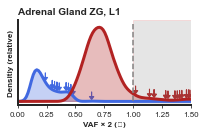

In [7]:
import numpy as np 
import pandas as pd
import os, glob
import matplotlib 
matplotlib.rcParams["font.family"] = 'arial'
import palettable
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.font_manager


def drawfigure_1D_densitogram (ax, vaf_list, j):
    tabl = palettable.tableau.Tableau_20.mpl_colors
    safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
    Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

    global colorlist
    colorlist = [i for i in safe7]
    sns.set_style("white")
    colorlist = ["royalblue", "firebrick", "forestgreen", "darkorange", Gr_10[6], Gr_10[5], Gr_10[4]]

    import scipy.stats as kde
    x = np.linspace(0, 3.0, 200)
    kde_function = kde.gaussian_kde( vaf_list * 2)
    weight = len(vaf_list) / len (NPVAF)
    y = kde_function(x) * weight

    ax.plot(x, y, color = colorlist[j], linewidth = 3, label="clone {}".format(j))
    ax.fill_between(x, y, color = colorlist[j], alpha=0.3)
    ax.set_xlim ([0,1.5])

    for k in SEX_CHR_INPUT_TSV.index:
        if MEMBERSHIP_CLEMENT_DECISION[k] == j:
            ax.arrow( x = NPVAF[k] * 2, y = float (kde_function( NPVAF[k] * 2 )) * weight + 0.3,
                      dx = 0, dy = -0.15, head_width = 0.04, head_length=0.1, fc = colorlist [MEMBERSHIP_CLEMENT_DECISION[k] ], ec = colorlist [MEMBERSHIP_CLEMENT_DECISION[k] ] )



if __name__ == "__main__":
    global INPUT_TSV, NPVAF, MEMBERSHIP_CLEMENT_DECISION, SEX_CHR_INPUT_TSV

    INPUT_TSV = pd.read_csv ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/3.BioData/Moore_1D_AG/glomerulosa_L1/0.input_containpos.txt", sep = "\t", header = None)
    with open("/data/project/Alzheimer/CLEMENT/03.combinedoutput/3.BioData/Moore_1D_AG/glomerulosa_L1/0.input_npvaf.txt", "r") as input_file:
        NPVAF = np.array ( [float(line.strip()) for line in input_file] ) 
    with open("/data/project/Alzheimer/CLEMENT/03.combinedoutput/3.BioData/Moore_1D_AG/glomerulosa_L1/result/CLEMENT_decision.membership.txt", "r") as input_file:
        MEMBERSHIP_CLEMENT_DECISION = np.array ( [int(line.strip()) for line in input_file] ) 
    SEX_CHR_INPUT_TSV = INPUT_TSV[INPUT_TSV[0].str.contains('chrX|chrY')]

    fig, ax = plt.subplots( nrows = 1, ncols = 1, figsize = (7.9/2.54, 4/2.54))
    ax.set_title ("Adrenal Gland ZG, L1", fontsize = 10, fontweight = "semibold", loc = "left")
    ax.set_xlabel( "VAF × 2 (𝜌)", fontsize = 8, fontweight = "semibold" )
    ax.set_ylabel( "Densitiy (relative)", fontsize = 8, fontweight = "semibold"  )
    ax.set_yticks( [] )
    sns.despine ( top = True, right = True, ax = ax)
    for axis in ['left','bottom']:
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis = 'x', direction='out', length = 3, labelsize = 8, bottom = True)

    for NUM_CLONE in sorted ( set (MEMBERSHIP_CLEMENT_DECISION) ):
        filtered_NPVAF = NPVAF [ np.where ( MEMBERSHIP_CLEMENT_DECISION == NUM_CLONE) [0]  ]
        drawfigure_1D_densitogram (ax, filtered_NPVAF, j = NUM_CLONE )

    


    ax.vlines ( x = 1 , ymin = 0, ymax = ax.get_ylim()[1], linestyles= "dashed", colors= "gray")
    # 사각형 그리기
    rect = matplotlib.patches.Rectangle(( 1, ax.get_ylim()[0]),                                # 사각형 꼭지점의 시작위치
                                                                ax.get_xlim()[1] - 1, ax.get_ylim()[1] - ax.get_ylim()[0],        # x 길이, y 길이
                                                                linewidth=0.5, edgecolor='red', facecolor='gray', alpha = 0.2) 
    ax.add_patch(rect)
    fig.show()
    fig.savefig ( "/data/project/Alzheimer/YSscript/cle/Revision/Sex_chromosome/AG_glomerulosa_L1.pdf", dpi = 300)


### Simple Kmeans와의 비교

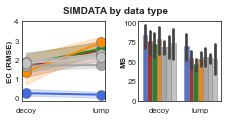

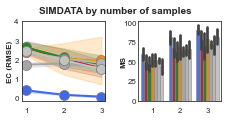

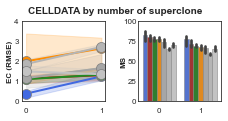

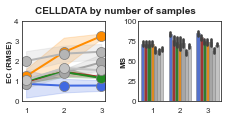

In [11]:
import numpy as np 
import pandas as pd
import os, glob, math
import matplotlib 
matplotlib.rcParams["font.family"] = 'arial'
import palettable
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

tabl = palettable.tableau.Tableau_20.mpl_colors
safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

colorlist = [i for i in safe7]
colorlist = ["royalblue", "firebrick", "forestgreen", "darkorange", "saddlebrown", "chocolate",  "tan"]
colorlist = ["royalblue", "firebrick", "forestgreen", "darkorange", "#7161ef", "#957fef",  "#b79ced"]
colorlist = ["royalblue", "firebrick", "forestgreen", "darkorange", Gr_10[6], Gr_10[5], Gr_10[4]]
sns.set_style("white")
#sns.set_palette("tab10")
sns.set_palette(sns.color_palette(colorlist))

def drawfigure (long_df, x, title, saveloc ):
    # Create a grouped bar graph
    fig, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (7.8 / 2.54, 4 / 2.54))
    fig.subplots_adjust ( wspace = 0.4, bottom = 0.15, top = 0.85, left = 0.08, right = 0.98)

    sns.lineplot(data = long_df, x = x, y = 'EC', hue = 'tool', 
                    linewidth = 2, marker = 'o',  markersize = 10, markeredgecolor = "gray", 
                    errorbar=('ci', 95), ax = ax[0])
    ax[0].set_xlabel( None )
    ax[0].set_ylabel( "RMSE", fontsize = 8, fontweight = "semibold" )
    ax[0].yaxis.set_label_coords( -0.11,  0.5)   # ylabel을 왼쪽으로 살짝 이동

    #if x != "DATA_TYPE":
    ax[0].set_xticks ( sorted(list ( set(long_df[x])) ) ) 
    ax[0].set_xticklabels ( ax[0].get_xticklabels(), fontsize = 8, fontweight = "normal")
    ax[0].set_yticks ( np.arange (0, math.ceil (max(long_df["EC"])) + 0.1, 1).astype(int) )
    ax[0].tick_params(axis = 'y', pad = 0) 
    ax[0].set_yticklabels ( ax[0].get_yticks(), fontsize = 8, fontweight = "normal")
    ax[0].legend_.remove()
    #ax[0].legend ( title = None, labels = ["CLEMENT", "pyclone", "sciclone", "qc", "elbow", "sil", "gap"] )

    sns.barplot(data = long_df, x = x, y = 'MS', hue = 'tool', 
                    linewidth = 0.5, edgecolor='gray', 
                    dodge = True,
                    ax = ax[1])
    ax[1].set_xlabel( None )
    ax[1].set_ylabel( "MS", fontsize = 8, fontweight = "semibold" )
    ax[1].yaxis.set_label_coords( -0.14, 0.5)   # ylabel을 왼쪽으로 살짝 이동
    ax[1].legend_.remove()
    ax[1].set_xticklabels ( ax[0].get_xticklabels(), fontsize = 8, fontweight = "normal")
    ax[1].set_yticks ( np.arange (0, math.ceil (max(long_df["MS"]) / 100) * 100 + 1, 25) )
    ax[1].tick_params(axis = 'y', pad = -1.5) 
    ax[1].set_yticklabels ( ax[1].get_yticks(), fontsize = 8, fontweight = "normal")

    plt.suptitle( title , fontsize = 10, y = 0.98, fontweight = "semibold" )
    #fig.text (x = 0.5, y = 0.02, ha = "center", s = "{}".format( x  ), fontsize = 10, fontweight = "semibold")

    plt.savefig ( saveloc, dpi = 300 )
    plt.show()


############################################################################################################################################


def simpleKmeans_SimData ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, FP_RATIO_LIST, SIMDATA_LIST):
    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone", "simpleK_elbow", "simpleK_silhouette", "simpleK_gap"]

    long_df = pd.DataFrame ( columns = ["DATA_TYPE", "NUM_BLOCK", "NUM_MUTATION", "DEPTH_MEAN", "FP_RATIO", "tool", "MS", "EC"] )
    for SIMDATA in SIMDATA_LIST:        
        for NUM_BLOCK in NUM_BLOCK_LIST:
            for FP_RATIO in FP_RATIO_LIST:
                for NUM_MUTATION in NUM_MUTATION_LIST:
                    for DEPTH_MEAN in DEPTH_MEAN_LIST:
                        INPUT_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/" + str (SIMDATA) + "/" + str(FP_RATIO) + "/BM_FINAL.tsv") )

                        for INPUT_DIR in INPUT_DIR_LIST:
                            if not os.path.exists ( INPUT_DIR ):
                                print (INPUT_DIR + "없음")
                                continue
        
                            df = pd.read_csv (INPUT_DIR , sep = "\t", header = None, index_col = 0)
                            for tool in toollist:
                                long_df.loc[len(long_df.index)] = [ SIMDATA, NUM_BLOCK, NUM_MUTATION, DEPTH_MEAN, FP_RATIO,  tool, df.loc [tool][1], df.loc [tool][3] ]   # 맨 끝에 하나씩 추가
            
    
    long_df["MS"] = long_df["MS"] * (100 / long_df["NUM_MUTATION"])     # 100점 만점으로 normalize

    # Visuallization
    drawfigure (long_df, 'DATA_TYPE', "SimData by data type", "/data/project/Alzheimer/YSscript/cle/Revision/with_simpleKmeans/1.SimData-by_datatype.pdf")
    drawfigure (long_df, 'NUM_BLOCK', "SimData by number of samples", "/data/project/Alzheimer/YSscript/cle/Revision/with_simpleKmeans/1.SimData-by_numsamples.pdf")

    return long_df


def simpleKmeans_CellData ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, NUM_PARENT_LIST, FP_RATIO_LIST, AXIS_RATIO_LIST):
    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone", "simpleK_elbow", "simpleK_silhouette", "simpleK_gap"]

    long_df = pd.DataFrame ( columns = ["DEPTH_MEAN", "NUM_BLOCK", "NUM_MUTATION", "NUM_PARENT", "FP_RATIO", "AXIS_RATIO", "tool", "MS", "EC"] )
    for NUM_PARENT in NUM_PARENT_LIST:        
        for FP_RATIO in FP_RATIO_LIST:
            for AXIS_RATIO in AXIS_RATIO_LIST:        
            
                for DEPTH_MEAN in DEPTH_MEAN_LIST:
                    for NUM_BLOCK in NUM_BLOCK_LIST:
                        for NUM_MUTATION in NUM_MUTATION_LIST:
                            INPUT_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/parent_" + str (NUM_PARENT) + "/fp_" + str(FP_RATIO) + "/axis_" + str(AXIS_RATIO) + "/BM_FINAL.tsv") )

                            for INPUT_DIR in INPUT_DIR_LIST:
                                if not os.path.exists ( INPUT_DIR ):
                                    print (INPUT_DIR + "없음")
                                    continue

                                df = pd.read_csv (INPUT_DIR , sep = "\t", header = None, index_col = 0)
                                for tool in toollist:
                                    long_df.loc[len(long_df.index)] = [ DEPTH_MEAN, NUM_BLOCK, NUM_MUTATION, NUM_PARENT, FP_RATIO, AXIS_RATIO, tool, df.loc [tool][1], df.loc [tool][3] ]   # 맨 끝에 하나씩 추가
                    
    long_df["MS"] = long_df["MS"] * (100 / long_df["NUM_MUTATION"])     # 100점 만점으로 normalize
    drawfigure (long_df, 'NUM_PARENT', "CellData by number of superclone".format (NUM_PARENT_LIST), "/data/project/Alzheimer/YSscript/cle/Revision/with_simpleKmeans/2.CellData-by_parent.pdf")
    drawfigure (long_df, 'NUM_BLOCK', "CellData by number of samples", "/data/project/Alzheimer/YSscript/cle/Revision/with_simpleKmeans/2.CellData-by_numsamples.pdf")


if __name__ == "__main__":
    kwargs = {}

    # SimData : decoy, lump
    NUM_BLOCK_LIST = [ 1, 2, 3 ]             # 1, 2, 3
    NUM_MUTATION_LIST = [ 1000, 500, 100 ]    # 100, 500, 100
    DEPTH_MEAN_LIST = [ 250, 125, 30 ]       # 250, 125, 30
    FP_RATIO_LIST = [ 0.0, 0.1  ]        # 0.0, 0.1
    SIMDATA_LIST = [ "decoy", "lump"] # "decoy", "lump"
    NUM_CLONE_LIST = [2, 3, 4, 5, 6, 7]      # 2, 3, 4, 5, 6, 7
    BENCHMARK_LIST = [0, 9]
    long_df = simpleKmeans_SimData ( NUM_BLOCK_LIST, [500], [250], [0.0], ["decoy", "lump"] )


    # CellData 
    NUM_BLOCK_LIST = [  1, 2, 3  ]             # 1, 2, 3
    NUM_MUTATION_LIST = [1000, 500, 100]    # 1000, 500, 100
    DEPTH_MEAN_LIST = [250, 125, 30]       # 250, 125, 30
    NUM_PARENT_LIST = [ 0, 1 ]       # 0 , 1
    FP_RATIO_LIST = [ 0.0  ]        # 0.0, 0.1
    AXIS_RATIO_LIST = [ -1 ]        # -1, 0.0, 0.2
    long_df = simpleKmeans_CellData ( NUM_BLOCK_LIST, [ 500 ], [250], [0, 1], [0.0], [-1] )

### SimData  : Proportions of each clone

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

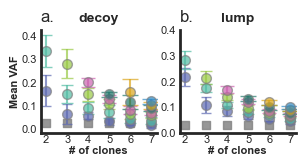

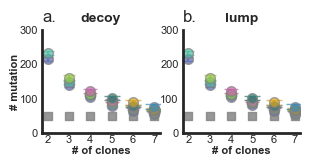

In [27]:
def drawfigure (long_df, ax, ax_no, title, x_order, y):
    import matplotlib 
    matplotlib.rcParams["font.family"] = 'arial'
    import palettable
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import ttest_ind
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

    tabl = palettable.tableau.Tableau_20.mpl_colors
    safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
    Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

    colorlist = [i for i in safe7]
    sns.set_style("white")
    #sns.set_palette("tab10")
    sns.set_palette(sns.color_palette(colorlist))

    # Create a grouped bar graph    
    sns.stripplot(data = long_df, x = 'membership_answer', y = y, order = x_order, hue = "membership_answer", hue_order = x_order, ax = ax[ax_no])
    sns.boxplot(data = long_df, x = 'membership_answer', y = y, order = x_order, ax = ax[ax_no]  )

    ax[ax_no].set_title (title, fontsize = 14, fontweight = "semibold")


def long_df_modify (long_df, col):
    import numpy as np

    # 제일 큰 건 FP_index
    FP_index = len ( np.array ( long_df.groupby("membership_answer")[ col ].mean() ) )  - 1

    # argsort를 이용해서 변환표 작성
    clone_dict = {}
    new_index = 0
    for prev_index  in np.argsort ( np.array ( long_df.groupby("membership_answer")[ col ].mean() )  )  :
        if prev_index == FP_index:  # FP
            clone_dict [FP_index] = "FP"
        else:
            clone_dict [prev_index] = new_index + 1
            new_index +=1

    # 새로운 membership_answer_new를 만들어줌
    new_col = []
    for k in range (long_df.shape[0]):
        if long_df.loc[k]["membership_answer"] != "FP":
            #print ( long_df.loc[k]["membership_answer"] ) 
            new_col.append ( str ( clone_dict [ int ( long_df.loc[k]["membership_answer"] ) ] ) )
        else:
            new_col.append ( "FP" )
        
    long_df ["membership_answer_new"] = new_col
    long_df ["membership_answer"] = new_col

    return long_df


def makedd (d, col, NUM_CLONE):
    dd = pd.merge ( d.groupby( 'membership_answer_new' )[col].mean().reset_index(), 
                            d.groupby( 'membership_answer_new' )[col].std().reset_index(),
                            left_on = "membership_answer_new", right_on = "membership_answer_new")
    dd.columns = [ "membership_answer_new", "mean", "std" ]
    dd ["NUM_CLONE"] = NUM_CLONE

    return dd

def drawfigure_all  (long_df_all, ax, title):
    import matplotlib 
    matplotlib.rcParams["font.family"] = 'arial'
    import palettable
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import ttest_ind
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

    tabl = palettable.tableau.Tableau_20.mpl_colors
    safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
    Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

    colorlist = [i for i in safe7]
    colorlist = { str(index) : value for index, value in enumerate(safe7)}
    colorlist ["FP"] = Gr_10[9]

    for k in range (long_df_all.shape[0]):
        if long_df_all.iloc[k]["membership_answer_new"] != "FP":
            ax.errorbar( x = long_df_all.iloc[k]["NUM_CLONE"] , y = long_df_all.iloc[k]["mean"],
                                yerr = long_df_all.iloc[k]["std"],   capsize = 3 +  int(long_df_all.iloc[k]["membership_answer_new"]) * 0.5, capthick = 20, barsabove = False, elinewidth = 1.5,
                                fmt='o', markersize = 7, markeredgewidth = 1, markeredgecolor = "gray",
                                alpha = 0.7, color = colorlist[ long_df_all.iloc[k]["membership_answer_new"] ]  ) 
        else:  # FP
            ax.scatter ( x = long_df_all.iloc[k]["NUM_CLONE"] , y = long_df_all.iloc[k]["mean"], 
                                marker = 's', s = 40, edgecolor = "gray",
                                alpha = 0.8, c = colorlist[ long_df_all.iloc[k]["membership_answer_new"] ] 
                            )
        
    ax.set_title (title, fontsize = 10, fontweight = "semibold")


########################################### MAIN  ##########################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, re, glob
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

kwargs = {}

NUM_BLOCK_LIST = [ 1  ]             # 1, 2, 3
NUM_MUTATION_LIST = [ 500 ]    # 100, 500, 1000
DEPTH_MEAN_LIST = [ 250 ]       # 250, 125, 30
FP_RATIO_LIST = [ 0.1  ]        # 0.0, 0.1
SIMDATA_LIST = [ "decoy", "lump" ] # "decoy", "lump"
NUM_CLONE_LIST = [ 2, 3, 4, 5, 6, 7 ]      # 2, 3, 4, 5, 6, 7
BENCHMARK_LIST = [0, 9]

long_df_vaf_all_decoy = pd.DataFrame ( columns = ["membership_answer_new", "mean", "std", "NUM_CLONE"] )
long_df_vaf_all_lump = pd.DataFrame ( columns = ["membership_answer_new", "mean", "std", "NUM_CLONE"] )
long_df_count_all_decoy = pd.DataFrame ( columns = ["membership_answer_new", "mean", "std", "NUM_CLONE"] )
long_df_count_all_lump = pd.DataFrame ( columns = ["membership_answer_new", "mean", "std", "NUM_CLONE"] )

for NUM_CLONE in NUM_CLONE_LIST:
    for FP_RATIO in FP_RATIO_LIST:
        # fig1, ax1 = plt.subplots( nrows = 1, ncols = 2, figsize = (6.3, 3.2))
        # fig2, ax2 = plt.subplots( nrows = 1, ncols = 2, figsize = (6.3, 3.2))

        for ax_no, SIMDATA in enumerate(SIMDATA_LIST):        
            long_df_vaf = pd.DataFrame ( columns = ["membership_answer", "clone", "meanVAF", "NUM_CLONE"] )
            long_df_count = pd.DataFrame ( columns = ["membership_answer", "clone", "count", "NUM_CLONE"] )
        
            for NUM_MUTATION in NUM_MUTATION_LIST:
                for NUM_BLOCK in NUM_BLOCK_LIST:
                    for DEPTH_MEAN in DEPTH_MEAN_LIST:
                        # INPUT_TSV_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/02.npvaf/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/" + str (SIMDATA) + "/" + str(FP_RATIO) + "/clone_" + str(NUM_CLONE) +  "/*/npvaf.txt" ) )
                        # for INPUT_TSV in INPUT_TSV_LIST:

                        for BENCHMARK_NO in range (BENCHMARK_LIST[0], BENCHMARK_LIST[1] + 1):
                            INPUT_TSV = "/data/project/Alzheimer/CLEMENT/02.npvaf/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/" + str (SIMDATA) + "/" + str(FP_RATIO) + "/clone_" + str(NUM_CLONE) +  "/" + str(BENCHMARK_NO) + "/npvaf.txt"
                            if not os.path.exists ( INPUT_TSV ):
                                print (INPUT_TSV + "없음")
                                continue

                            df = pd.read_csv (INPUT_TSV, sep = "\t", index_col = 0)
                            tt = pd.melt ( df.groupby( 'membership_answer' ).mean().reset_index(), id_vars=['membership_answer'], var_name='clone', value_name='meanVAF')
                            uu = pd.melt ( df.groupby( 'membership_answer' ).count().reset_index(), id_vars=['membership_answer'], var_name='clone', value_name='count')
                            tt ["NUM_CLONE"] = NUM_CLONE
                            uu ["NUM_CLONE"] = NUM_CLONE

                            tt = long_df_modify (tt, "meanVAF")
                            uu = long_df_modify (uu, "count")

                            long_df_vaf = long_df_vaf.append( tt , ignore_index = True) 
                            long_df_count = long_df_count.append( uu, ignore_index = True) 
            
            # drawfigure (long_df_vaf, ax1, ax_no, SIMDATA, x_order =  [str(i) for i in np.arange (1, NUM_CLONE + 1)] + ["FP"] , y = "meanVAF")
            # drawfigure (long_df_count, ax2, ax_no, SIMDATA,  x_order = [str(i) for i in np.arange (1, NUM_CLONE + 1)] + ["FP"] , y = "count")
            
            if SIMDATA == "decoy":
                long_df_vaf_all_decoy = long_df_vaf_all_decoy.append (  makedd (long_df_vaf, "meanVAF", NUM_CLONE) , ignore_index = True)
                long_df_count_all_decoy = long_df_count_all_decoy.append (  makedd (long_df_count, "count", NUM_CLONE) , ignore_index = True)
            elif SIMDATA == "lump":
                long_df_vaf_all_lump = long_df_vaf_all_lump.append (  makedd (long_df_vaf, "meanVAF", NUM_CLONE) , ignore_index = True)
                long_df_count_all_lump = long_df_count_all_lump.append (  makedd (long_df_count, "count", NUM_CLONE) , ignore_index = True)


        for k, ax1_individual in enumerate(ax1):
            ax1_individual.set_title (chr (k+65) + "." , fontsize = 20, loc = "left")    # A. B. C.
            ax1_individual.set_ylim (0, 0.5)
            ax1_individual.set_ylabel (None)
            #ax1_individual.legend_.remove()
        fig1.savefig ( "/data/project/Alzheimer/YSscript/cle/Revision/proportions/1.SimData/meanVAF_clone" + str(NUM_CLONE) + ".jpg" , dpi = 300 )
        fig1.show()
        
        for k, ax2_individual in enumerate(ax2):
            ax2_individual.set_title (chr (k+65) + "." , fontsize = 20, loc = "left")    # A. B. C.
            ax2_individual.set_ylim (0,500)
            ax2_individual.set_ylabel (None)
            #ax2_individual.legend_.remove()
        fig2.savefig ( "/data/project/Alzheimer/YSscript/cle/Revision/proportions/1.SimData/count_clone" + str(NUM_CLONE) + ".jpg" , dpi = 300 )
        fig2.show()



#1. VAF proportion

fig_all, ax_all = plt.subplots( nrows = 1, ncols = 2, figsize = (7.8 / 2.54, 4 / 2.54))
fig_all.subplots_adjust ( hspace = 0.25, bottom = 0.15, top = 0.80, left = 0.12, right = 0.95)

drawfigure_all ( long_df_vaf_all_decoy, ax_all[0] , "decoy")
drawfigure_all ( long_df_vaf_all_lump, ax_all[1]  , "lump")

for k, ax_individual in enumerate(ax_all):
    ax_individual.set_title (chr (k+97) + "." , fontsize = 12, loc = "left")    # A. B. C.
    sns.despine ( top = True, right = True, ax = ax_individual)
    for axis in ['left','bottom']:
        ax_individual.spines[axis].set_linewidth(2)
    ax_individual.set_xlabel ( "# of clones", fontsize = 8, fontweight = "semibold")
    ax_individual.xaxis.set_label_coords( 0.5, -0.13)   # xlabel
    ax_individual.set_ylabel ( None )

    ax_individual.set_xticks ( sorted (list ( set (long_df_count_all_decoy["NUM_CLONE"]) ) ))
    ax_individual.set_yticks ( [0.0, 0.1, 0.2, 0.3, 0.4] )

    # print ( ax_individual.get_xticklabels() )
    ax_individual.set_xticklabels ( ax_individual.get_xticks(), fontsize = 8, fontweight = "normal" ) 
    ax_individual.set_yticklabels ( ax_individual.get_yticks(), fontsize = 8, fontweight = "normal" ) 
    ax_individual.tick_params(axis = 'x', pad = -1.8) # 원래의 위치를 기주느로 이동
    ax_individual.tick_params(axis = 'y', pad = -0.3)
    
ax_all[0].set_ylabel ( "Mean VAF", fontsize = 8, fontweight = "semibold" )
ax_all[0].yaxis.set_label_coords( -0.18, 0.5)   # ylabel을 default보다 살짝 오른쪽으로 이동



fig_all.savefig ( "/data/project/Alzheimer/YSscript/cle/Revision/proportions/1.SimData/meanVAF_all_scatter.pdf" , dpi = 300 )
fig_all.show()


#2. COUNT proportions

fig_all, ax_all = plt.subplots( nrows = 1, ncols = 2, figsize = (7.8 / 2.54, 4 / 2.54))
fig_all.subplots_adjust ( hspace = 0.25, bottom = 0.15, top = 0.80, left = 0.12, right = 0.96)

drawfigure_all ( long_df_count_all_decoy, ax_all[0] , "decoy")
drawfigure_all ( long_df_count_all_lump, ax_all[1]  , "lump")

for k, ax_individual in enumerate(ax_all):
    ax_individual.set_title (chr (k+97) + "." , fontsize = 12, loc = "left")    # A. B. C.
    sns.despine ( top = True, right = True, ax = ax_individual)
    for axis in ['left','bottom']:
        ax_individual.spines[axis].set_linewidth(2)
    ax_individual.set_xlabel ( "# of clones", fontsize = 8, fontweight = "semibold")
    ax_individual.xaxis.set_label_coords( 0.5, -0.13)   # xlabel
    ax_individual.set_ylabel ( None )

    ax_individual.set_xticks ( sorted (list ( set (long_df_count_all_decoy["NUM_CLONE"]) ) ))
    ax_individual.set_yticks ( [0, 100, 200, 300] )

    ax_individual.set_xticklabels ( ax_individual.get_xticks(), fontsize = 8, fontweight = "normal" ) 
    ax_individual.set_yticklabels ( ax_individual.get_yticks(), fontsize = 8, fontweight = "normal" ) 
    ax_individual.tick_params(axis = 'x', pad = -1.8)
    ax_individual.tick_params(axis = 'y', pad = -0.3)

ax_all[0].set_ylabel ( "# mutation", fontsize = 8, fontweight = "semibold" )
ax_all[0].yaxis.set_label_coords( -0.19, 0.5)   # ylabel을 default보다 살짝 오른쪽으로 이동

fig_all.savefig ( "/data/project/Alzheimer/YSscript/cle/Revision/proportions/1.SimData/count_all_scatter.pdf" , dpi = 300 )
fig_all.show()





In [24]:
long_df_vaf_all_decoy[long_df_vaf_all_decoy ["membership_answer_new"] == "FP"]

,membership_answer_new,mean,std,NUM_CLONE
2,FP,0.029127,0.001882,2
6,FP,0.029294,0.002135,3
11,FP,0.028968,0.003173,4
17,FP,0.028722,0.002664,5
24,FP,0.027771,0.002820,6
32,FP,0.028897,0.001911,7


In [25]:
long_df_vaf_all_lump[long_df_vaf_all_lump ["membership_answer_new"] == "FP"]

,membership_answer_new,mean,std,NUM_CLONE
2,FP,0.029299,0.002647,2
6,FP,0.029739,0.002694,3
11,FP,0.028889,0.002789,4
17,FP,0.029190,0.002616,5
24,FP,0.029628,0.001935,6
32,FP,0.028676,0.002342,7


### CellData : Proportions of each clone

<ipython-input-180-73c0e9ed9ac1>:138: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_individual.set_yticklabels ( ax_individual.get_yticklabels(), fontsize = 8, fontweight = "normal" )
/opt/Yonsei/python/3.8.1/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3331: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


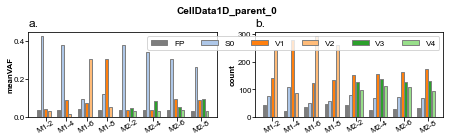

In [180]:
def plt_groupedbarchart (long_df, ax, col = "count", bar_width = 0.2):
    import palettable
    import matplotlib.pyplot as plt

    # Get unique samples and membership answers for x-axis and hue
    samples = long_df['sample'].unique()
    membership_answers = long_df['membership_answer'].unique()

    #
    tabl = palettable.tableau.Tableau_20.mpl_colors
    Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors
    colorlist = {}
    for clone_index, clone in enumerate( membership_answers) :
        colorlist [clone] = tabl[clone_index]
    colorlist ["FP"] = Gr_10[9]

    # Define bar width and spacing

    spacing = 2 * bar_width

    # Calculate x-positions for bars
    x_pos = 0
    x_pos_tick = []

    # Create a bar chart for each membership answer
    for sample_index, sample in enumerate (samples):
        x_pos_first = -1

        for clone_index, clone in enumerate(membership_answers):
            if (clone not in list ( long_df[long_df["sample"] == sample]["membership_answer"]) ):       # 해당 클론 (V1, V2)이 해당 샘플에 없으면 넘어가자
                continue

            if np.isnan (long_df[long_df["sample"] == sample].groupby("membership_answer")[ col ].mean()[clone]) == True:
                continue

            y_values = long_df[long_df["sample"] == sample].groupby("membership_answer")[ col ].mean()[clone]

            ax.bar(x_pos, y_values, width = bar_width, label = clone, color = colorlist[clone], edgecolor = "gray")
            if x_pos_first == -1:
                x_pos_first = x_pos
            x_pos += (bar_width) * 1.25

        x_pos_tick.append (  (x_pos_first + x_pos) / 2)
        x_pos += spacing

    # Customize the plot
    ax.set_xlabel('Sample')
    ax.set_ylabel( col )
    ax.set_xticks( x_pos_tick, samples)

    # Get legend handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()

    # Deduplicate the legend data
    unique_labels = []
    unique_handles = []
    for handle, label in zip(handles, labels):
        if label not in unique_labels:
            unique_labels.append(label)
            unique_handles.append(handle)

    # Create a new legend with deduplicated data
    if "S0,V1" in membership_answers:
        ax.legend(unique_handles, unique_labels, fontsize = 'small', loc = "upper right", ncol = 5)
    else:
        ax.legend(unique_handles, unique_labels, fontsize = 'small', loc = "upper right", ncol = 6)


########################################### MAIN  ##########################################

import pandas as pd
import numpy as np
import matplotlib 
matplotlib.rcParams["font.family"] = 'arial'
import matplotlib.pyplot as plt
import seaborn as sns
import os, re, glob

kwargs = {}

NUM_BLOCK_LIST = [ 1 ]             # 1, 2, 3
NUM_MUTATION_LIST = [ 500 ]    # 1000, 500, 100
DEPTH_MEAN_LIST = [ 250 ]       # 250, 125, 30
NUM_PARENT_LIST = [ 0 ]       # 0 , 1
FP_RATIO_LIST = [ 0.1  ]        # 0.0, 0.1
AXIS_RATIO_LIST = [ -1 ]        # -1, 0.0, 0.2



for ax_no, NUM_PARENT in enumerate( NUM_PARENT_LIST ):
    fig, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (15.92 / 2.54, 5/ 2.54))
    fig.subplots_adjust ( hspace = 0.25, bottom = 0.2, top = 0.80, left = 0.06, right = 0.98)

    for FP_RATIO in FP_RATIO_LIST:
        long_df_vaf = pd.DataFrame ( columns = ["membership_answer", "block", "meanVAF", "sample"] )
        long_df_count = pd.DataFrame ( columns = ["membership_answer", "block", "count", "sample"] )
    
        for NUM_MUTATION in NUM_MUTATION_LIST:
            for NUM_BLOCK in NUM_BLOCK_LIST:
                for DEPTH_MEAN in DEPTH_MEAN_LIST:
                    SAMPLE_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/02.npvaf/2.CellData/CellData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/parent_" + str (NUM_PARENT) + "/fp_" + str(FP_RATIO) + "/axis_-1/*" ) )

                    for SAMPLE_DIR in SAMPLE_DIR_LIST:
                        SAMPLE = SAMPLE_DIR.split("/")[-1]
                        INPUT_TSV_LIST = sorted ( glob.glob ( SAMPLE_DIR + "/*/npvaf.txt" ) )

                        for INPUT_TSV in INPUT_TSV_LIST:
                            if not os.path.exists ( INPUT_TSV ):
                                print (INPUT_TSV + "없음")
                                continue
                            df = pd.read_csv (INPUT_TSV, sep = "\t", index_col = 0)
                            tt = pd.melt ( df.groupby( 'membership_answer' ).mean().reset_index(), id_vars=['membership_answer'], var_name='block', value_name='meanVAF')
                            uu = pd.melt ( df.groupby( 'membership_answer' ).count().reset_index(), id_vars=['membership_answer'], var_name='block', value_name='count')
                            tt ["sample"] = SAMPLE
                            uu["sample"] = SAMPLE

                            long_df_vaf = long_df_vaf.append( tt , ignore_index = True) 
                            long_df_count = long_df_count.append( uu, ignore_index = True) 

    if NUM_PARENT == 1:
        cat_dtype = pd.CategoricalDtype(categories = [ "FP", "S0", "V1", "V2", "V3", "V4", "S0,V1", "S0,V2", "S0,V3", "S0,V4"], ordered=True)
        long_df_vaf['membership_answer'] = long_df_vaf['membership_answer'].astype(cat_dtype)
        long_df_vaf = long_df_vaf.sort_values(by='membership_answer').reset_index(drop = True)
        long_df_count['membership_answer'] = long_df_count['membership_answer'].astype(cat_dtype)
        long_df_count = long_df_count.sort_values(by='membership_answer').reset_index(drop = True)


    plt_groupedbarchart (long_df_vaf, ax[0], col = "meanVAF", bar_width = 0.2)
    plt_groupedbarchart (long_df_count, ax[1], col = "count", bar_width = 0.2)
    fig.suptitle ("CellData1D_parent_{}".format(NUM_PARENT), fontsize = 10, fontweight = "semibold")
            
    for k, ax_individual in enumerate(ax):
        ax_individual.set_title (chr (k+97) + "." , fontsize = 12, loc = "left")    # A. B. C.
        ax_individual.set_xlabel ( ax_individual.get_xlabel(), fontsize = 8, fontweight = "semibold" )
        ax_individual.set_xlabel ( None )
        ax_individual.set_ylabel ( ax_individual.get_ylabel(), fontsize = 8, fontweight = "semibold" )
        ax_individual.set_xticklabels ( ax_individual.get_xticklabels(), fontsize = 8, fontweight = "normal" ) 
        ax_individual.set_yticklabels ( ax_individual.get_yticklabels(), fontsize = 8, fontweight = "normal" ) 
        ax_individual.tick_params(axis = 'x', rotation = 30, pad = -2.2)
        ax_individual.tick_params(axis = 'y', pad = -0.3)
        ax_individual.xaxis.set_label_coords( 0.5, -0.18)   # xlabel을 위쪽으로 살짝 이동
        ax_individual.yaxis.set_label_coords( -0.1, 0.5)   # ylabel을 default보다 살짝 오른쪽으로 이동
    ax[0].yaxis.set_label_coords( -0.08, 0.5)   # ylabel을 default보다 살짝 오른쪽으로 이동
    ax[0].get_legend().remove()

    

    ttt_vaf = round ( pd.DataFrame ( long_df_vaf.groupby (["sample", "membership_answer"]).mean() ) , 2)
    ttt_count = round ( pd.DataFrame ( long_df_count.groupby (["sample", "membership_answer"]).mean() ) , 2)

    ttt_vaf.to_csv ( "/data/project/Alzheimer/YSscript/cle/Revision/proportions/2.CellData/1D_vaf_parent_{}.tsv".format (NUM_PARENT), sep = "\t", index = True)
    ttt_count.to_csv ( "/data/project/Alzheimer/YSscript/cle/Revision/proportions/2.CellData/1D_count_parent_{}.tsv".format (NUM_PARENT), sep = "\t", index = True)

    fig.savefig ( "/data/project/Alzheimer/YSscript/cle/Revision/proportions/2.CellData/1D_parent_{}.pdf".format(NUM_PARENT) , dpi = 300 )
    fig.show()


In [181]:
long_df_count [ long_df_count["membership_answer"].isin (["S0,V1", "S0,V2", "S0,V3", "S0,V4", "FP"] ) == False ].max()

membership_answer        V4
block                block0
count                   301
sample                 M2-8
dtype: object

---

### CellData : FP densitogram

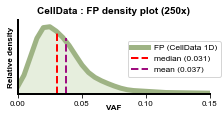

In [108]:
def visualization (vaf_list, OUTPUT_JPG, **kwargs):
    import matplotlib
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import scipy.stats as kde

    matplotlib.rcParams["font.family"] ="arial"
    fig, ax = plt.subplots ( figsize = (7.8 / 2.54, 4 / 2.54) )
    fig.subplots_adjust ( wspace = 0.4, bottom = 0.2, top = 0.85, left = 0.08, right = 0.95)

    
    #ax.set_yticks ( np.arange (0, np.max(y), 0.1))

    ax.set_title ( "CellData : FP density plot ({}x)".format(kwargs["DEPTH_MEAN"]), fontsize = 10, fontweight='bold', color='black')

    x = np.linspace(0, 1, 200)
    kde_function = kde.gaussian_kde( vaf_list )
    y = kde_function(x) 

    ax.plot (x, y, label = "FP (CellData 1D)", linewidth = 5, color = '#9EB384')
    ax.fill_between(x, y, color='#CEDEBD', alpha=0.5)

    # median & mean
    ax.axvline(x = np.median (vaf_list),  ymin = 0, ymax = kde_function ( np.median(vaf_list) ) [0] / plt.ylim()[1]  * 0.97 , label = "median ({})".format ( round ( np.median(vaf_list), 3) ), linestyle='--', linewidth=2, color = 'red' )       
    ax.axvline(x = np.mean (vaf_list),  ymin = 0, ymax = kde_function ( np.mean(vaf_list) ) [0] / plt.ylim()[1]  , label = "mean ({})".format (round (np.mean (vaf_list), 3) ), linestyle='--', linewidth=2, color = '#9F0D7F' )       

    # 축 설정
    ax.set_xlabel("VAF", fontdict = {"fontsize" : 8, "fontweight" : "semibold"})
    ax.xaxis.set_label_coords( 0.5, -0.15)   # xlabel을 아래쪽으로 살짝 이동
    ax.set_ylabel("Relative density", fontdict = {"fontsize" : 8 , "fontweight" : "semibold" })
    ax.set_xticks (  np.round ( np.linspace (0, 1.01, 21), 2) )
    ax.set_xticklabels (  ax.get_xticklabels() , fontsize = 8, fontweight = "normal" )
    ax.set_yticks ( [] ) 
    #ax.set_yticklabels ( ax.get_yticklabels(), fontsize = 8, fontweight = "normal")
    ax.axis ( [0, 0.15, 0, np.max (y) * 1.1] )

    # Spine 설정
    sns.despine ( top = True, right = True, ax = ax)
    for axis in ['left','bottom']:
        ax.spines[axis].set_linewidth(2)
    fig.legend( fontsize = 'small', loc = "center right" )
    fig.savefig ( OUTPUT_JPG, dpi = 300 )


if __name__ == "__main__":
    import numpy as np
    import os,re
    import pandas as pd

    kwargs = {"DEPTH_MEAN" : 250}   # 1100, 250x
    DIR = "/data/project/Alzheimer/CLEMENT/01.INPUT_TSV/2.CellData/CellData_1D/" + str(kwargs["DEPTH_MEAN"]) + "x"

    vaf_list =  []


    for filename in sorted(os.listdir (DIR)):
        kwargs["SAMPLENAME"] = re.split(r'[_ .]', filename)[0]
        if os.path.isdir( DIR + "/" + filename ) == True:
            continue

        inputdf = pd.read_csv ( DIR + "/" + filename, sep = "\t", header = None)

        if inputdf.shape[1] == 3: #  If 4th column (BQ) is absent
            inputdf.columns = ["pos", "sample", "info"]
            inputdf.astype ({"pos":"str", "sample":"str", "info":"str"})
        elif inputdf.shape[1] == 4: #  If 4th column (BQ) is present
            inputdf.columns = ["pos", "sample", "info", "BQ"]
            inputdf.astype ({"pos":"str", "sample":"str", "info":"str", "BQ":"str"})

        for k in range (inputdf.shape[0]):
            depth = int ( inputdf.iloc[k]["info"].split(",")[0] ) 
            alt = int ( inputdf.iloc[k]["info"].split(",")[1] ) 
            vaf = round (alt / depth, 3) 

            if inputdf.iloc[k]["sample"] == "FP":           # FP만 고른다
                vaf_list.append ( vaf )
            
        #print ( "{} : vaf_list = {}".format (kwargs ["SAMPLENAME"], len(vaf_list) ) )

    visualization ( np.array (vaf_list) , "/data/project/Alzheimer/YSscript/cle/Revision/FPdistribution/2.CellData_FPdistribution_{}x.pdf".format(kwargs["DEPTH_MEAN"]), ** kwargs)

### CellData : VAF - FP probability (2023.08.04)

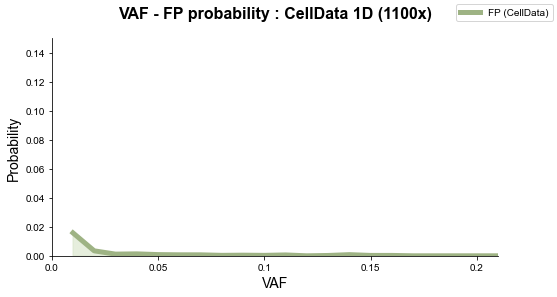

In [3]:
def visualization (vaf_fP_ratio, **kwargs):
    import matplotlib.pyplot as plt

    x = np.arange (0, 101, 1)
    y = np.array ( [ vaf_fp_ratio[i] for i in x] )

    fig, ax = plt.subplots (figsize = (8, 4))
    #ax.set_yticks ( np.arange (0, np.max(y), 0.1))

    ax.set_title ( "VAF - FP probability : CellData 1D ({}x)".format(kwargs["DEPTH_MEAN"]), fontsize = 16, fontweight='bold', color='black', pad=20)

    ax.plot (x, y, label = "FP (CellData)", linewidth = 5, color = '#9EB384')
    ax.fill_between(x, y, color='#CEDEBD', alpha=0.5)
    #ax.axvline(x = 0.02,  ymin = 0, ymax = TN_prior_cal (0.02)/plt.ylim()[1] * 1.03, label = "median", linestyle='--', linewidth=2, color = 'red' )

    # 축 설정
    ax.set_xticks (  np.arange (0, 101, 5) )
    ax.set_xticklabels (  np.round ( np.arange (0, 1.01, 0.05), 2 ) )
    ax.set_xlabel("VAF", fontdict = {"fontsize" : 14})
    ax.set_ylabel("Probability", fontdict = {"fontsize" : 14})
    ax.axis ( [0, 21, 0, 0.15] )

    # Spine 설정
    fig.gca().spines['top'].set_visible(False)
    fig.gca().spines['right'].set_visible(False)
    fig.legend()



if __name__ == "__main__":
    import numpy as np
    import os,re
    import pandas as pd

    kwargs = {"DEPTH_MEAN" : 1100}
    DIR = "/data/project/Alzheimer/CLEMENT/01.INPUT_TSV/2.CellData/CellData_1D/" + str(kwargs["DEPTH_MEAN"]) + "x"

    vaf_cnt =  np.array([ [0, 0] ] * 101 )
    vaf_fp_ratio = [ [] ] * 101


    for filename in sorted(os.listdir (DIR)):
        kwargs["SAMPLENAME"] = re.split(r'[_ .]', filename)[0]
        #print ( kwargs ["SAMPLENAME"])
        if os.path.isdir( DIR + "/" + filename ) == True:
            continue

        inputdf = pd.read_csv ( DIR + "/" + filename, sep = "\t", header = None)

        if inputdf.shape[1] == 3: #  If 4th column (BQ) is absent
            inputdf.columns = ["pos", "sample", "info"]
            inputdf.astype ({"pos":"str", "sample":"str", "info":"str"})
        elif inputdf.shape[1] == 4: #  If 4th column (BQ) is present
            inputdf.columns = ["pos", "sample", "info", "BQ"]
            inputdf.astype ({"pos":"str", "sample":"str", "info":"str", "BQ":"str"})

        for k in range (inputdf.shape[0]):
            depth = int ( inputdf.iloc[k]["info"].split(",")[0] ) 
            alt = int ( inputdf.iloc[k]["info"].split(",")[1] ) 
            vaf = int ( np.round (alt / depth, 2) * 100 )

            if inputdf.iloc[k]["sample"] == "FP":
                vaf_cnt [vaf][0] = vaf_cnt [vaf][0] + 1
            else:
                vaf_cnt [vaf][1] = vaf_cnt [vaf][1] +  1

    for k in range (len (vaf_cnt)):
        if (vaf_cnt[k][0]  + vaf_cnt[k][1] ) == 0:
            vaf_fp_ratio[k] = np.nan
        else:
            if (vaf_cnt[k][0]  + vaf_cnt[k][1] ) < 200:
                vaf_fp_ratio[k] = np.nan
            else:
                vaf_fp_ratio[k] = vaf_cnt[k][0] / (vaf_cnt[k][0]  + vaf_cnt[k][1] )

    visualization (vaf_fp_ratio, **kwargs)

---

### SimData : VAF - FP probability (2023.08.03)

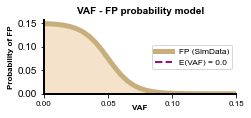

In [110]:
def TN_prior_cal(x):
    from scipy.special import expit
    return (1 - expit( 100*x - 5)) * 0.15

if __name__ == "__main__":
    import numpy as np
    import matplotlib
    matplotlib.rcParams["font.family"] = "arial"
    import matplotlib.pyplot as plt
    from scipy.integrate import simps  # For numerical integration
    
    interval = 1 / 200
    x = np.linspace(0, 1, int(1 / interval) + 1 )
    y = np.array ( [TN_prior_cal(i) for i in x] )

    t = 0
    for i, j in zip (x, y):
        t += (interval * j)
    #y = y / t                # 면적이 1이 되도록 하는 과정

    e = round ( simps(x * y, x) ,  3)   # E(X)를 구하는 함수


    fig, ax = plt.subplots ( figsize = (7.8 / 2.54, 4 / 2.54) )
    fig.subplots_adjust ( wspace = 0.4, bottom = 0.2, top = 0.85, left = 0.08, right = 0.95)
    ax.set_yticks ( np.arange (0, np.max(y) * 1.1, 0.05))

    ax.set_title ( "VAF - FP probability model", fontsize = 10, fontweight='bold', color='black')

    ax.plot (x, y, label = "FP (SimData)", linewidth = 5, color = '#C8AE7D')
    ax.fill_between(x, y, color='#EAC696', alpha=0.5)
    
    # 축 설정
    ax.set_xlabel("VAF", fontdict = {"fontsize" : 8, "fontweight" : "semibold"})
    ax.xaxis.set_label_coords( 0.5, -0.15)   # xlabel을 아래쪽으로 살짝 이동
    ax.set_ylabel("Probability of FP", fontdict = {"fontsize" : 8 , "fontweight" : "semibold" })
    ax.set_xticks (  np.round ( np.linspace (0, 1.01, 21), 2) )
    ax.set_xticklabels (  ax.get_xticklabels() , fontsize = 8, fontweight = "normal" )
    #ax.set_yticks ( [] ) 
    ax.axis ( [0, 0.15, 0, np.max (y) * 1.05] )

    ax.axvline(x = e,  ymin = 0, ymax = ( TN_prior_cal ( e ) / t) / 1.2  , label = "E(VAF) = {}".format (e), linestyle='--', linewidth=2, color =  '#9F0D7F' )

    # Spine 설정
    sns.despine ( top = True, right = True, ax = ax)
    for axis in ['left','bottom']:
        ax.spines[axis].set_linewidth(2)
    ax.legend( fontsize = 'small', loc = "center right" )
    fig.savefig (  "/data/project/Alzheimer/YSscript/cle/Revision/FPdistribution/1.SimData_FPmodel.pdf" , dpi = 300 )



(0.0, 0.15, 0.0, 20.155135762140073)

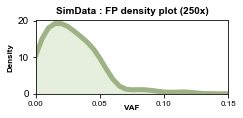

In [128]:
import  argparse, os, scipy, math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as kde
import random
import copy
import collections
from random import *

def TN_prior_cal(x):
    from scipy.special import expit
    return (1 - expit( 100*x - 5)) * 0.15

def random_custDist(x0, x1, custDist, size=None, nControl=10**6):
    samples=[]
    nLoop=0
    while len(samples) < size and nLoop < nControl:
        x = np.random.uniform(low=x0,high=x1)
        prop = custDist(x)
        assert prop >=0 and prop <= 1
        if np.random.uniform(low = 0,high = 1) <=prop:
            samples += [x]
        nLoop+=1
    return samples

vaf_list = []
for i in range (100):
    vaf_list.append ( random_custDist(x0 = 0 ,x1 = 1, custDist = TN_prior_cal, size = 1)[0]  )
vaf_list = np.array (vaf_list)

matplotlib.rcParams["font.family"] ="arial"
fig, ax = plt.subplots ( figsize = (7.8 / 2.54 , 4 / 2.54 ) )
fig.subplots_adjust ( wspace = 0.4, bottom = 0.2, top = 0.85, left = 0.08, right = 0.95)

ax.set_title ( "SimData : FP density plot ({}x)".format(kwargs["DEPTH_MEAN"]), fontsize = 10, fontweight='bold', color='black')

x = np.linspace(0, 1, 200)
kde_function = kde.gaussian_kde( vaf_list )
y = kde_function (x)

ax.plot (x, y, label = "FP (SimData 1D)", linewidth = 5, color = '#9EB384')
ax.fill_between(x, y, color='#CEDEBD', alpha=0.5)

# 축 설정
ax.set_xlabel("VAF", fontdict = {"fontsize" : 8, "fontweight" : "semibold"})
ax.xaxis.set_label_coords( 0.5, -0.15)   # xlabel을 아래쪽으로 살짝 이동
ax.set_ylabel("Density", fontdict = {"fontsize" : 8 , "fontweight" : "semibold" })
ax.set_xticks (  np.round ( np.linspace (0, 1.01, 21), 2) )
ax.set_xticklabels (  ax.get_xticklabels() , fontsize = 8, fontweight = "normal" )
#ax.set_yticks ( [] ) 
ax.axis ( [0, 0.15, 0, np.max (y) * 1.05] )


### SimData : FP densitogram (2023.08.03)


======================	1.SimData_1D/n500_250x/decoy/0.1	===============================

======================	1.SimData_1D/n500_250x/lump/0.1	===============================


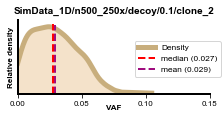

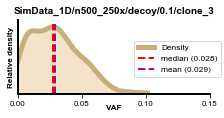

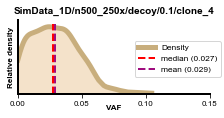

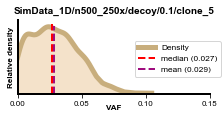

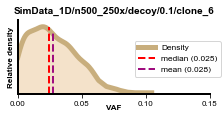

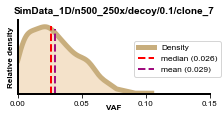

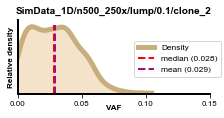

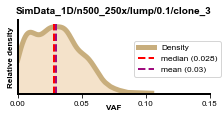

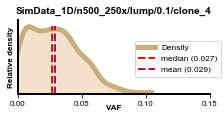

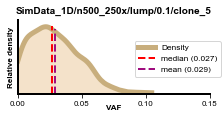

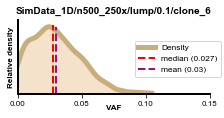

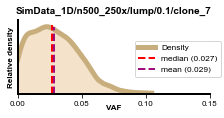

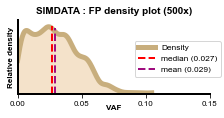

In [136]:
def draw_fp_densitogram (x, TITLE, OUTPUT_JPG):
    import numpy as np
    from scipy.stats import gaussian_kde
    import matplotlib
    matplotlib.rcParams["font.family"] = "URW Gothic"
    import matplotlib.pyplot as plt

    if len (x) != 0:           # FP = 0 이고 비어있으면 아예 densitogram 안됨
        x = sorted ( np.array (x) )
        kde_function = gaussian_kde( x )
        y = kde_function (x)

        matplotlib.rcParams["font.family"] ="arial"
        fig, ax = plt.subplots ( figsize = (7.8 / 2.54, 4 / 2.54) )
        fig.subplots_adjust ( wspace = 0.4, bottom = 0.2, top = 0.85, left = 0.08, right = 0.95)

        #ax.set_yticks ( np.arange (0, np.max(y), 0.1))

        ax.set_title ( TITLE, fontsize = 10, fontweight = 'semibold', color = 'black')

        ax.plot (x, y, label = "Density", linewidth = 5, color = '#C8AE7D')
        ax.fill_between(x, y, color = '#EAC696', alpha = 0.5)
        ax.axvline(x = np.median (x),  ymin = 0, ymax = kde_function ( np.median(x) ) [0] / plt.ylim()[1] , label = "median ({})".format ( round ( np.median(x), 3) ), linestyle = '--', linewidth = 2, color = 'red' )       
        ax.axvline(x = np.mean (x),  ymin = 0, ymax = kde_function ( np.mean(x) ) [0] / plt.ylim()[1]  , label = "mean ({})".format (round (np.mean (x), 3) ), linestyle = '--', linewidth = 2, color = '#9F0D7F' )       

        # 축 설정
        ax.set_xlabel("VAF", fontdict = {"fontsize" : 8, "fontweight" : "semibold"})
        ax.xaxis.set_label_coords( 0.5, -0.15)   # xlabel을 아래쪽으로 살짝 이동
        ax.set_ylabel("Relative density", fontdict = {"fontsize" : 8 , "fontweight" : "semibold" })
        ax.set_xticks (  np.round ( np.linspace (0, 1.01, 21), 2) )
        ax.set_xticklabels (  ax.get_xticklabels() , fontsize = 8, fontweight = "normal" )
        ax.set_yticks ( [] ) 
        #ax.set_yticklabels ( ax.get_yticklabels(), fontsize = 8, fontweight = "normal")
        ax.axis ( [0, 0.15, 0, np.max (y) * 1.1] )

        # Spine 설정
        sns.despine ( top = True, right = True, ax = ax)
        for axis in ['left','bottom']:
            ax.spines[axis].set_linewidth(2)

        fig.legend( fontsize = 'small', loc = "center right" )
        fig.savefig ( OUTPUT_JPG, dpi = 300 )




if __name__ == "__main__":    
    import os
    import pandas as pd

    kwargs = {}

    NUM_BLOCK_LIST = [1]             # 1, 2, 3
    NUM_MUTATION_LIST = [500]    # 500, 100
    DEPTH_MEAN_LIST = [250]       # 100, 30
    FP_RATIO_LIST = [ 0.1 ]        # 0.0, 0.1
    SIMDATA_LIST = [ "decoy", "lump"] # "decoy", "lump"
    NUM_CLONE_LIST = [ 2, 3, 4, 5, 6, 7 ]      # 2, 3, 4, 5, 6, 7
    BENCHMARK_LIST = [0, 9]; kwargs["BENCHMARK_START"] = BENCHMARK_LIST[0];  kwargs["BENCHMARK_END"] = BENCHMARK_LIST[1]

    x_total = []
    for NUM_BLOCK in NUM_BLOCK_LIST:
        for NUM_MUTATION in NUM_MUTATION_LIST:
            for DEPTH_MEAN in DEPTH_MEAN_LIST:        
                for SIMDATA in SIMDATA_LIST:
                    for FP_RATIO in FP_RATIO_LIST:
                        print("\n======================\t1.SimData_{}D/n{}_{}x/{}/{}\t===============================".format( NUM_BLOCK ,NUM_MUTATION, DEPTH_MEAN, SIMDATA, FP_RATIO ))            
                        for NUM_CLONE in NUM_CLONE_LIST:
                            x_regional = []
                            for ii in range(kwargs["BENCHMARK_START"],  kwargs["BENCHMARK_END"] + 1):
                                kwargs["NPVAF_DIR"] = "/data/project/Alzheimer/CLEMENT/02.npvaf/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN)  + "x/" + str(SIMDATA) + "/" + str(FP_RATIO) + "/clone_" + str(NUM_CLONE) + "/" +  str(ii) + "/npvaf.txt"
                                npvaf = pd.read_csv (kwargs["NPVAF_DIR"], sep = "\t",  index_col = 0  )
                                npvaf = npvaf [ npvaf["membership_answer"] == "FP"]
                                for i in range (NUM_BLOCK):
                                    x_regional = x_regional +  list ( npvaf.iloc[:, i] ) 
                                    x_total = x_total +  list ( npvaf.iloc[:, i] ) 
                            draw_fp_densitogram (x_regional, "SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN)  + "x/" + str(SIMDATA) + "/" + str(FP_RATIO) + "/clone_" + str(NUM_CLONE), "/data/project/Alzheimer/YSscript/cle/Revision/FPdistribution/1.SimData_FPdistribution_{}x_clone{}.pdf".format(NUM_MUTATION_LIST[0], NUM_CLONE) )
    
    draw_fp_densitogram (x_total, "SIMDATA : FP density plot ({}x)".format ( NUM_MUTATION_LIST[0] ), "/data/project/Alzheimer/YSscript/cle/Revision/FPdistribution/1.SimData_FPdistribution_{}x.pdf".format(NUM_MUTATION_LIST[0]) )
                                

In [30]:
np.mean(x_total)

0.0105375